In [29]:
# Import the necessary libraries related to training the model.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [30]:
# Read the data from the csv file
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.read_csv("bank.csv", header=None, names=col_names, skiprows=[0])

In [31]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [32]:
# Check if there are any missing values in the dataset
bank.isnull().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

In [33]:
# Convert the categorical data into numerical data
catergorical_columns = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.get_dummies(bank, columns=catergorical_columns, drop_first=True, prefix=None)
# Convert the non-binary categorical data into numerical data
label_encoder = LabelEncoder()
bank["region"] = label_encoder.fit_transform(bank["region"])

In [34]:
# Calculate the descriptive statistics of the data
bank.describe()

,age,region,income,children
count,600.000000,600.000000,600.000000,600.000000
mean,42.395000,1.231667,27524.031217,1.011667
std,14.424947,1.286113,12899.468246,1.056752
min,18.000000,0.000000,5014.210000,0.000000
25%,30.000000,0.000000,17264.500000,0.000000
50%,42.000000,1.000000,24925.300000,1.000000
75%,55.250000,3.000000,36172.675000,2.000000
max,67.000000,3.000000,63130.100000,3.000000


In [35]:
# Calculating the correlation matrix to find if there are any strong correlations between the features
# Mainly we are interested in the correlation between the features and the target variable
# Good correlation values ranges
bank = bank.drop(columns=["id"])
correlation_matrix = bank.corr()

In [36]:
correlation_matrix

,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
age,1.000000,0.011167,0.752726,0.023572,-0.090081,0.010394,0.077733,0.184389,-0.035312,-0.016154,0.173825
region,0.011167,1.000000,-0.000212,0.011520,-0.035018,0.006188,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.752726,-0.000212,1.000000,0.036761,-0.023845,-0.008386,0.081556,0.266164,0.031616,-0.014662,0.221991
children,0.023572,0.011520,0.036761,1.000000,-0.014206,-0.048716,0.036455,0.041536,0.006238,-0.074339,-0.057663
sex_MALE,-0.090081,-0.035018,-0.023845,-0.014206,1.000000,0.021110,0.006667,0.007207,-0.019466,0.066465,0.046843
married_YES,0.010394,0.006188,-0.008386,-0.048716,0.021110,1.000000,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
car_YES,0.077733,0.021860,0.081556,0.036455,0.006667,-0.009571,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act_YES,0.184389,0.084382,0.266164,0.041536,0.007207,0.028604,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act_YES,-0.035312,-0.013356,0.031616,0.006238,-0.019466,-0.059996,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage_YES,-0.016154,0.026083,-0.014662,-0.074339,0.066465,-0.021711,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


In [37]:
# Calculate the total correlation of the features with the target variable
total_correlation = correlation_matrix["pep_YES"].abs().sum() - 1
total_correlation

0.8581973022085059

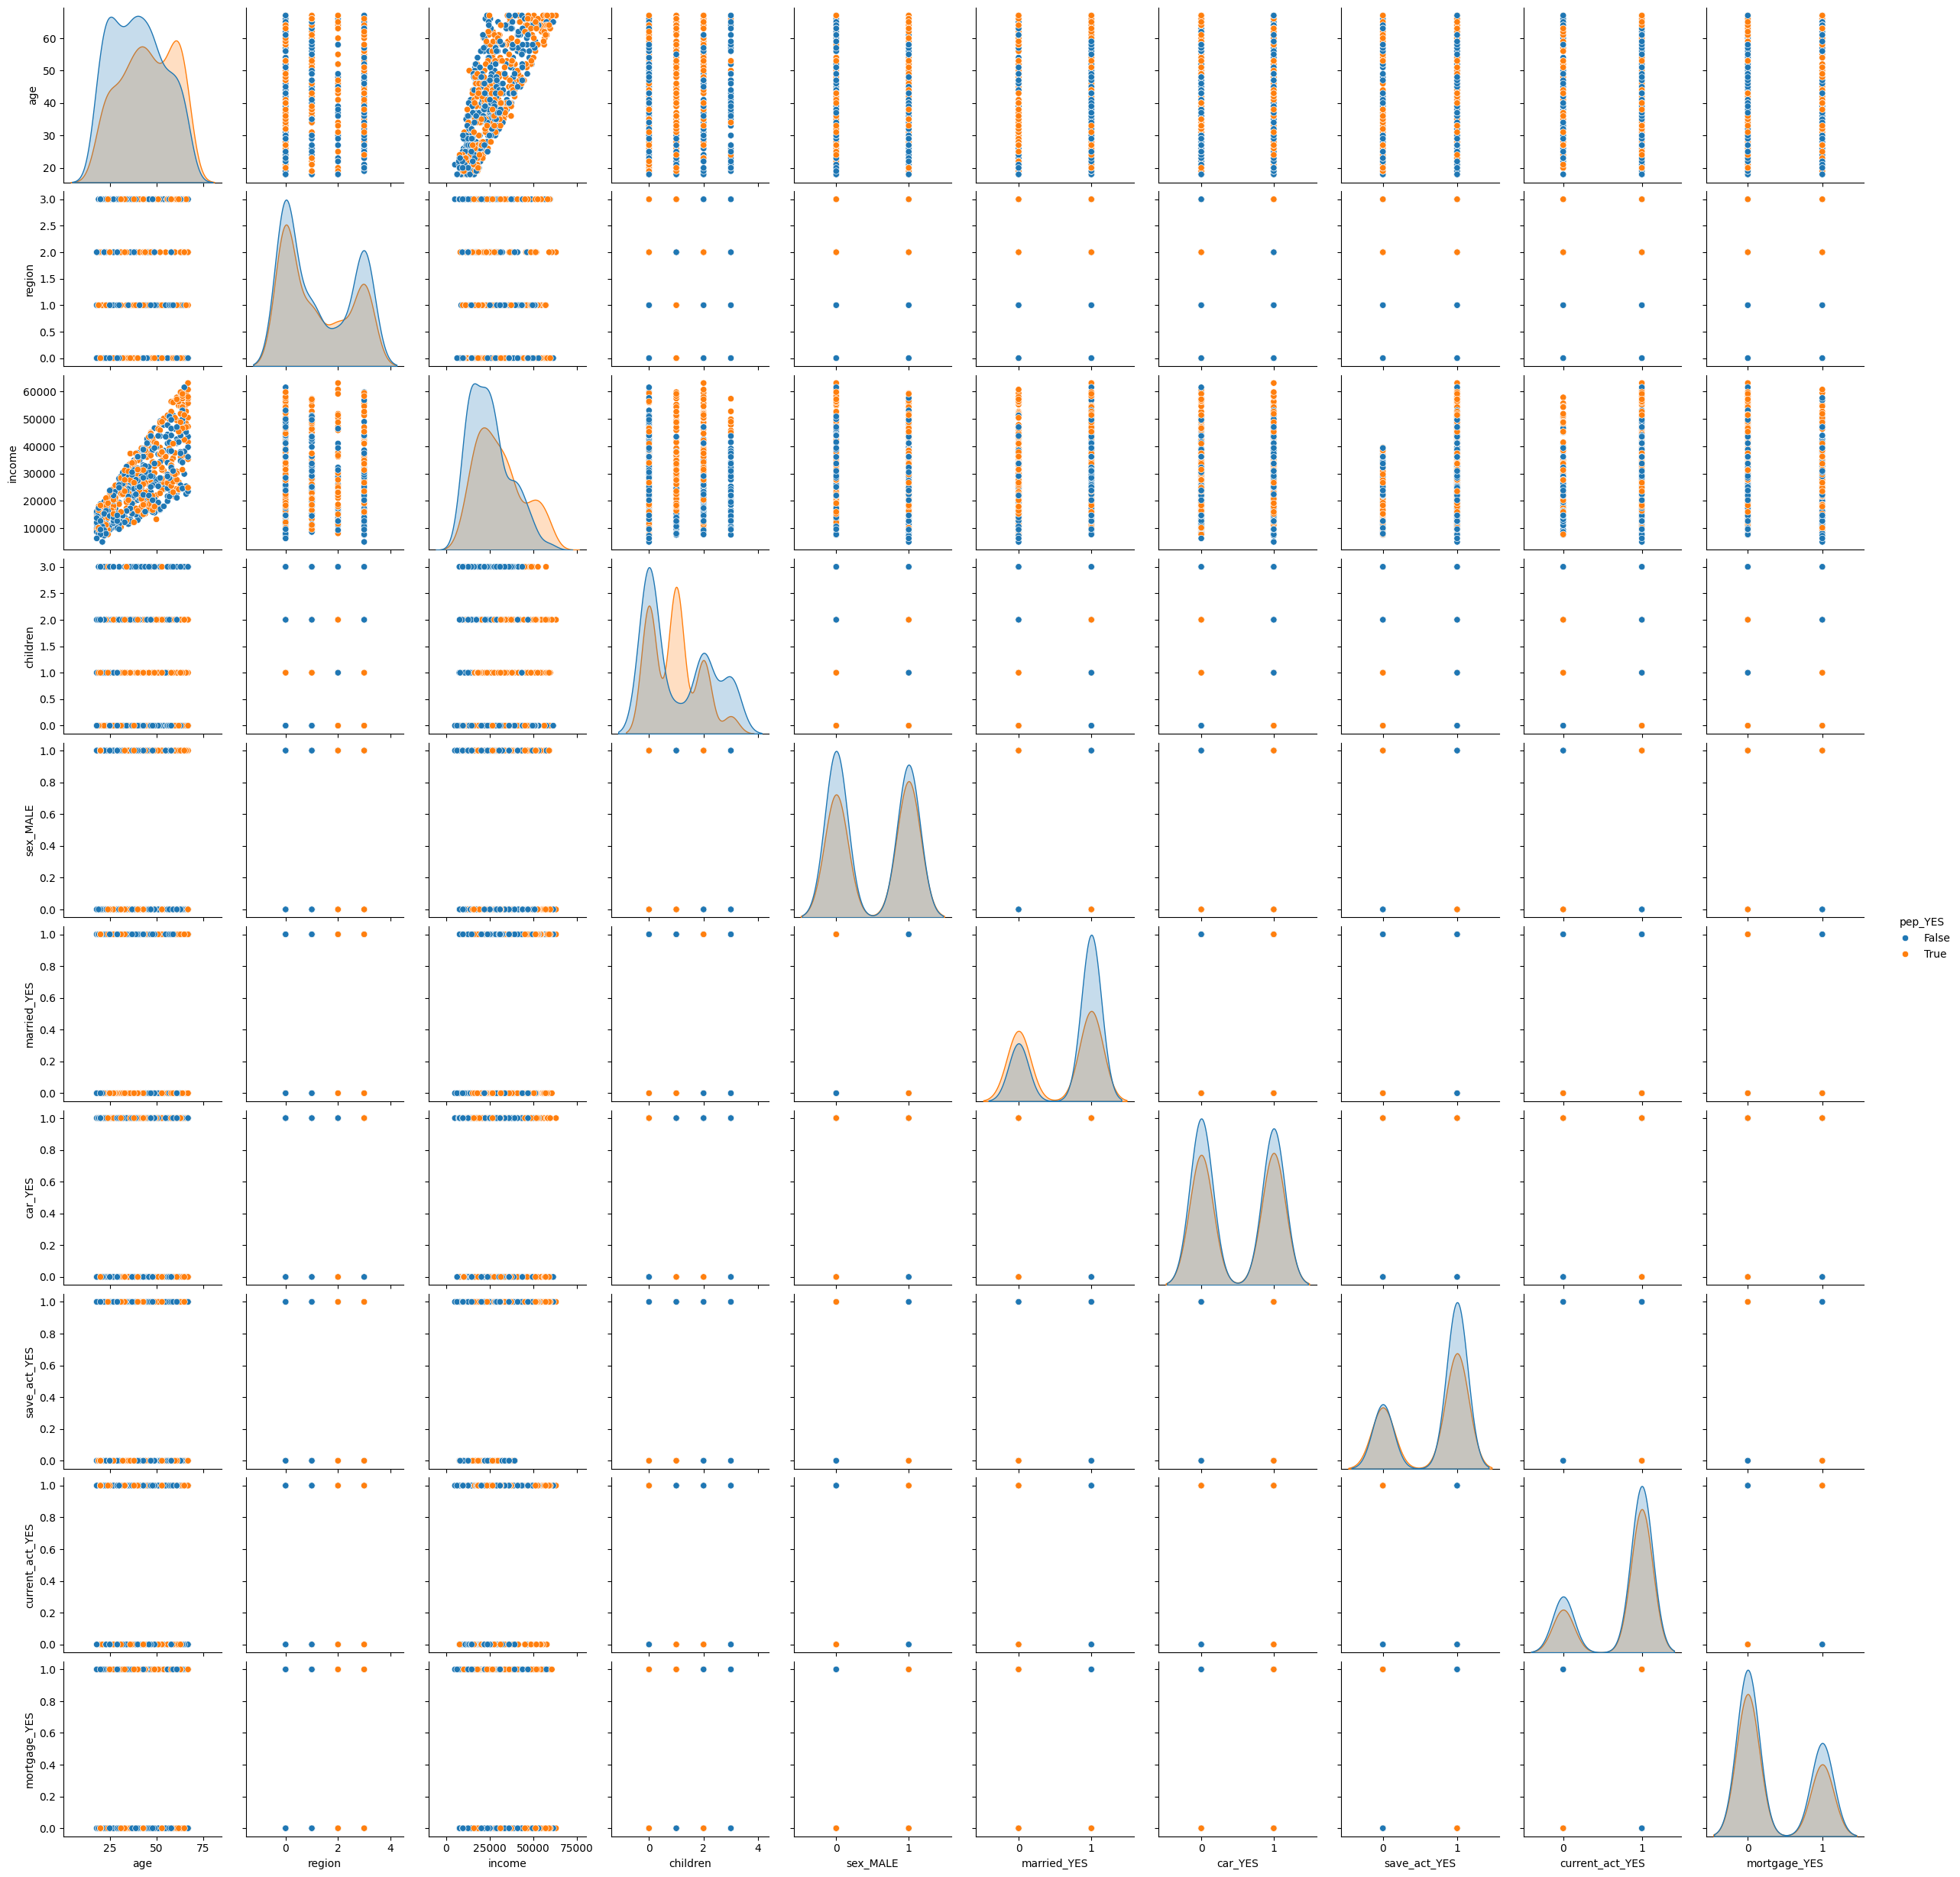

In [38]:
# Visualizing the data by using a pairplot (It will be a little messy since we have multiple features)
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(bank, hue="pep_YES")

### What we have learned from preprocessing the data:
- The least correlated features are "cars", "region", "married", "sex" and "save_act". Which was not surprising since these status such as sex did not do much in terms of telling if that person is politically exposed or not.
- The total correlation between all features are a huge number though.